# Introduction to PySpark

**Hadoop** is an open source project that became the dominant processing toolkit for big data. <br />
**Hadoop** consists of a file system (Hadoop Distributed File System or HDFS) and its own implementation
of MapReduce. <br />
MapReduce is a programming model and an associated implementation for processing and generating big data
sets with a parallel, distributed algorithm on a cluster. <br />
A limitation of **Hadoop** is that it uses storage instead of memory, making it slow. <br />
**Spark** uses distributed, in-memory data structures to accelerate the data processing. <br />
There is debate, however, on which one is better. <br />
**Hadoop** is good at batch processing of large datasets, data warehousing, and exploratory data analysis. <br />
**Spark** is good at real-time analytics, interactive data exploration, and iterative algorithms. <br />
On this tutorial, we will focus on the latter using **PySpark**.


**PySpark** produces RDDs, which stands for Resilient Distributed Datasets, that are immutable collections of objects.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## CSV Processing

Some analysis comes from an online tutorial. <br />
I don't recall exactly from which website, maybe DataCamp.

Dataset downloaded from [kaggle](https://www.kaggle.com/datasets/fivethirtyeight/fivethirtyeight-daily-show-guests-dataset?resource=download).

We deal with the .csv as if it was text.

In [7]:
from pyspark.context import SparkContext

sc = SparkContext('local', 'intro_to_spark')
sc.setLogLevel("OFF")

In [11]:
raw_data = sc.textFile(name="NonUploadedData/daily_show_guests.csv")
raw_data.take(5)

['YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List',
 '1999,actor,1/11/99,Acting,Michael J. Fox',
 '1999,Comedian,1/12/99,Comedy,Sandra Bernhard',
 '1999,television actress,1/13/99,Acting,Tracey Ullman',
 '1999,film actress,1/14/99,Acting,Gillian Anderson']

We now need to create a new object as RDD objects are immutable. <br />
Once we have created them, we can't change their values.

In [12]:
daily_show = raw_data.map(lambda line: line.split(','))
daily_show.take(5)

[['YEAR', 'GoogleKnowlege_Occupation', 'Show', 'Group', 'Raw_Guest_List'],
 ['1999', 'actor', '1/11/99', 'Acting', 'Michael J. Fox'],
 ['1999', 'Comedian', '1/12/99', 'Comedy', 'Sandra Bernhard'],
 ['1999', 'television actress', '1/13/99', 'Acting', 'Tracey Ullman'],
 ['1999', 'film actress', '1/14/99', 'Acting', 'Gillian Anderson']]

In [14]:
# tally the number of guests each year
tally = daily_show.map(lambda x: (x[0], 1)).reduceByKey(lambda x,y: x+y)
tally.take(tally.count())  # tally.count() is similar to python len(tally)

[('YEAR', 1),
 ('1999', 166),
 ('2000', 169),
 ('2001', 157),
 ('2002', 159),
 ('2003', 166),
 ('2004', 164),
 ('2005', 162),
 ('2006', 161),
 ('2007', 141),
 ('2008', 164),
 ('2009', 163),
 ('2010', 165),
 ('2011', 163),
 ('2012', 164),
 ('2013', 166),
 ('2014', 163),
 ('2015', 100)]

In [15]:
# remove the header
def filter_header(line):
    if 'YEAR' not in line[0]:
        return True

filtered_daily_show = daily_show.filter(lambda line: filter_header(line))
filtered_daily_show.take(5)

[['1999', 'actor', '1/11/99', 'Acting', 'Michael J. Fox'],
 ['1999', 'Comedian', '1/12/99', 'Comedy', 'Sandra Bernhard'],
 ['1999', 'television actress', '1/13/99', 'Acting', 'Tracey Ullman'],
 ['1999', 'film actress', '1/14/99', 'Acting', 'Gillian Anderson'],
 ['1999', 'actor', '1/18/99', 'Acting', 'David Alan Grier']]

In [16]:
# the following:
# - filters out professions for which the occupation is blank
# - lowercases each profession
# - generates a histogram of professions
filtered_daily_show.filter(lambda line: line[1] != '') \
                   .map(lambda line: (line[1].lower(), 1)) \
                   .reduceByKey(lambda x,y: x+y) \
                   .take(5)

[('actor', 596),
 ('comedian', 103),
 ('television actress', 13),
 ('film actress', 21),
 ('singer-lyricist', 2)]

In [17]:
sc.stop()

# JSON File processing

In [35]:
from pyspark.context import SparkContext

sc = SparkContext('local', 'intro_to_spark')
sc.setLogLevel("OFF")

In [37]:
raw_census = sc.textFile(name="NonUploadedData/census_2010.json")
raw_census.take(4)

['{"females": 1994141, "total": 4079669, "males": 2085528, "age": 0, "year": 2010}',
 '{"females": 1997991, "total": 4085341, "males": 2087350, "age": 1, "year": 2010}',
 '{"females": 2000746, "total": 4089295, "males": 2088549, "age": 2, "year": 2010}',
 '{"females": 2002756, "total": 4092221, "males": 2089465, "age": 3, "year": 2010}']

In [38]:
sc.stop()

In [66]:
# now let's read it using SQLContext. SQLContext is being deprecated, replacing with SparkSession.

In [67]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('intro_to_spark').getOrCreate()

In [68]:
df = spark.read.json("NonUploadedData/census_2010.json")
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- females: long (nullable = true)
 |-- males: long (nullable = true)
 |-- total: long (nullable = true)
 |-- year: long (nullable = true)



In [69]:
df.show(5)

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
+---+-------+-------+-------+----+
only showing top 5 rows



In [70]:
# this now works very similar to a pandas df
# capture the values of the first row
row_one = df.head(5)[0]

row_one.females

1994141

In [71]:
# only rows where age > 5
df[df.age > 5].show(5)

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
+---+-------+-------+-------+----+
only showing top 5 rows



<AxesSubplot:>

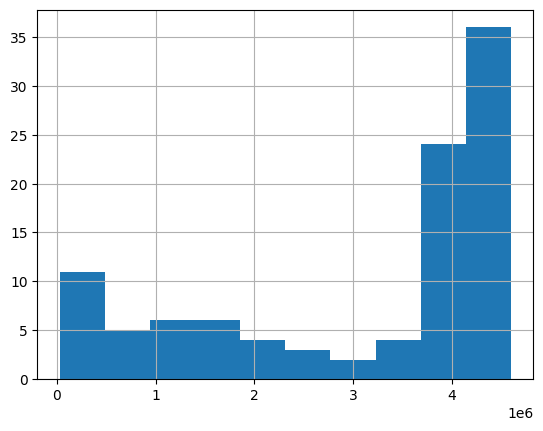

In [72]:
# convert to pandas to use some of pandas functionality
pandas_df = df.toPandas()
pandas_df.total.hist()

In [73]:
pandas_df

,age,females,males,total,year
0,0,1994141,2085528,4079669,2010
1,1,1997991,2087350,4085341,2010
2,2,2000746,2088549,4089295,2010
3,3,2002756,2089465,4092221,2010
4,4,2004366,2090436,4094802,2010
...,...,...,...,...,...
96,96,74056,22021,96077,2010
97,97,51337,13994,65331,2010
98,98,35778,8321,44099,2010
99,99,25673,4612,30285,2010


In [74]:
# let's add a column that is age group
def add_age_group(df):
    idx = np.floor(df['age']/10)
    return f'{idx*10:.0f}-{idx*10+9:.0f}'

pandas_df['ageGroup'] = pandas_df.apply(add_age_group, axis=1)
pandas_df

,age,females,males,total,year,ageGroup
0,0,1994141,2085528,4079669,2010,0-9
1,1,1997991,2087350,4085341,2010,0-9
2,2,2000746,2088549,4089295,2010,0-9
3,3,2002756,2089465,4092221,2010,0-9
4,4,2004366,2090436,4094802,2010,0-9
...,...,...,...,...,...,...
96,96,74056,22021,96077,2010,90-99
97,97,51337,13994,65331,2010,90-99
98,98,35778,8321,44099,2010,90-99
99,99,25673,4612,30285,2010,90-99


Text(0, 0.5, 'total')

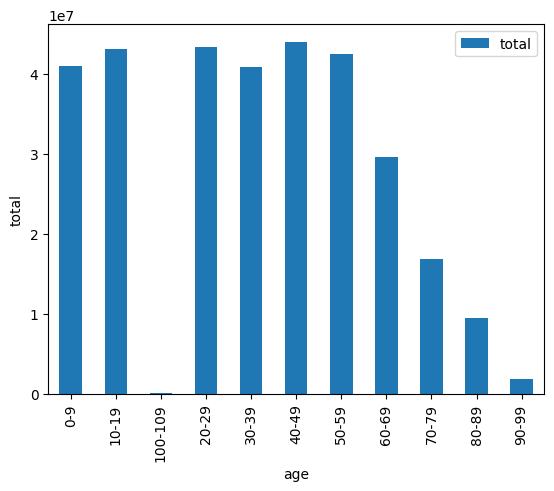

In [75]:
# Create a DataFrame with the desired x and y values
df_grouped = pandas_df.groupby('ageGroup')['total'].sum().reset_index()

# Create the bar plot
df_grouped.plot(x='ageGroup', y='total', kind='bar')
plt.xlabel('age')
plt.ylabel('total')

In [76]:
spark.stop()

# Working with SQL

In [77]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('intro_to_spark').getOrCreate()

In [78]:
df = spark.read.json("NonUploadedData/census_2010.json")
df.show(5)

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
+---+-------+-------+-------+----+
only showing top 5 rows



In [79]:
# create table
df.createOrReplaceTempView(name='census2010')

In [80]:
spark.sql("SELECT * FROM census2010 LIMIT 5").show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
+---+-------+-------+-------+----+



In [81]:
query = 'SELECT males, females FROM census2010 WHERE age > 5 AND age < 15'
spark.sql(query).show()

+-------+-------+
|  males|females|
+-------+-------+
|2093905|2007781|
|2097080|2010281|
|2101670|2013771|
|2108014|2018603|
|2114217|2023289|
|2118390|2026352|
|2132030|2037286|
|2159943|2060100|
|2195773|2089651|
+-------+-------+



In [82]:
df = spark.sql('SELECT males, females FROM census2010')
df.describe().show()

+-------+------------------+-----------------+
|summary|             males|          females|
+-------+------------------+-----------------+
|  count|               101|              101|
|   mean|1520095.3168316833|1571460.287128713|
| stddev|  818587.208016823|748671.0493484351|
|    min|              4612|            25673|
|    max|           2285990|          2331572|
+-------+------------------+-----------------+



In [83]:
# adding another table
df1 = spark.read.json("NonUploadedData/census_2000.json")
df1.createOrReplaceTempView('census2000')

In [85]:
query = """
SELECT census2010.total AS Census2010Tot, census2000.total AS Census2000Tot
FROM census2010
JOIN census2000
ON census2010.age = census2000.age
"""
spark.sql(query).show(10)

+-------------+-------------+
|Census2010Tot|Census2000Tot|
+-------------+-------------+
|      4079669|      3733034|
|      4085341|      3825896|
|      4089295|      3904845|
|      4092221|      3970865|
|      4094802|      4024943|
|      4097728|      4068061|
|      4101686|      4101204|
|      4107361|      4125360|
|      4115441|      4141510|
|      4126617|      4150640|
+-------------+-------------+
only showing top 10 rows



In [87]:
query = """
SELECT SUM(census2010.total), SUM(census2000.total)
FROM census2010
JOIN census2000
ON census2010.age = census2000.age
"""
spark.sql(query).show()

+----------+----------+
|sum(total)|sum(total)|
+----------+----------+
| 312247116| 284594395|
+----------+----------+



In [88]:
spark.stop()

# More EDA of CSVs

Tutorials in kaggle: [1](https://www.kaggle.com/code/emarkhauser/pyspark-tutorial) [2](https://www.kaggle.com/code/masumrumi/a-pyspark-tutorial-with-titanic) [3](https://www.kaggle.com/code/nilaychauhan/pyspark-tutorial-for-beginners)

The data can be downloaded [here](https://www.kaggle.com/competitions/titanic/data?select=train.csv).

### Spark DataFrame

In [90]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('tutorial').getOrCreate()

In [170]:
df_train = spark.read.csv('NonUploadedData/titanic_train.csv', header = True, inferSchema=True)
titanic_train = df_train.alias("titanic_train")
titanic_train.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

In [95]:
# Show only one column
titanic_train.select('Pclass').show(5)

+------+
|Pclass|
+------+
|     3|
|     1|
|     3|
|     1|
|     3|
+------+
only showing top 5 rows



In [96]:
# group by functions:  Average age per passenger class
titanic_train.groupby('Pclass').avg('Age').show()

+------+------------------+
|Pclass|          avg(Age)|
+------+------------------+
|     1|38.233440860215055|
|     3| 25.14061971830986|
|     2| 29.87763005780347|
+------+------------------+



In [97]:
# group by functions:  Average survival per passenger class
titanic_train.groupby('Pclass').avg('Survived').show()

+------+-------------------+
|Pclass|      avg(Survived)|
+------+-------------------+
|     1| 0.6296296296296297|
|     3|0.24236252545824846|
|     2|0.47282608695652173|
+------+-------------------+



This shows that the better the class, the better likelihood of survival.

In [119]:
# show ave fare by class
titanic_train.groupby('Pclass').avg('Fare').sort('avg(Fare)', ascending=[False]).show()

+------+------------------+
|Pclass|         avg(Fare)|
+------+------------------+
|     1| 84.15468749999992|
|     2| 20.66218315217391|
|     3|13.675550101832997|
+------+------------------+



In [123]:
# let's store the data above in a "list" (it is actually an array of row type)
fare_mean = titanic_train.groupby('Pclass').avg('Fare').sort('avg(Fare)', ascending=[False]).collect()
fare_mean

[Row(Pclass=1, avg(Fare)=84.15468749999992),
 Row(Pclass=2, avg(Fare)=20.66218315217391),
 Row(Pclass=3, avg(Fare)=13.675550101832997)]

In [122]:
fare_mean[0][1]

84.15468749999992

In [128]:
# Let's see the spread over the fare mean for the first class
new_df = titanic_train.withColumn('Fare', titanic_train['Fare']-fare_mean[0][1])[titanic_train['Pclass'] == 1]
new_df.show(10)

+-----------+--------+------+--------------------+------+----+-----+-----+--------+-------------------+-----------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|  Ticket|               Fare|      Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+--------+-------------------+-----------+--------+
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|PC 17599|-12.871387499999926|        C85|       C|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|  113803|-31.054687499999922|       C123|       S|
|          7|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0|   17463|-32.292187499999926|        E46|       S|
|         12|       1|     1|Bonnell, Miss. El...|female|58.0|    0|    0|  113783|-57.604687499999926|       C103|       S|
|         24|       1|     1|Sloper, Mr. Willi...|  male|28.0|    0|    0|  113788| -48.65468749999992|         A6|       S|


<AxesSubplot:>

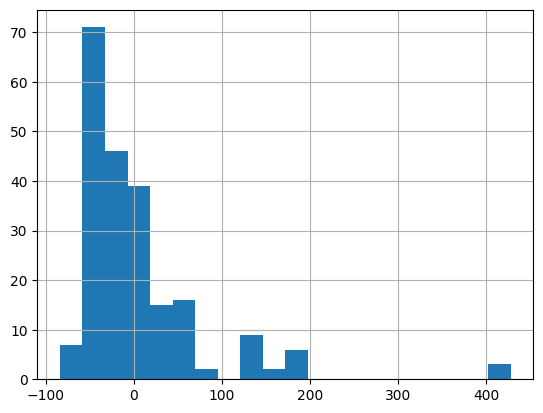

In [131]:
# and let's plot this
pandas_df = new_df.toPandas()
pandas_df['Fare'].hist(bins=20)

This shows that someone paid a lot lot more than the average.

### Quering with SQL

In [103]:
# Use SQL for querying
titanic_train.createOrReplaceTempView('stats')

In [108]:
# show the whole table (only first 5 rows)
spark.sql('SELECT * FROM stats').show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

In [110]:
# show all entries (only first 10 rows) ordered by fare
spark.sql("SELECT * FROM stats ORDER BY Fare DESC LIMIT 10").show()

+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+---------------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|  Ticket|    Fare|          Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+---------------+--------+
|        680|       1|     1|Cardeza, Mr. Thom...|  male|36.0|    0|    1|PC 17755|512.3292|    B51 B53 B55|       C|
|        259|       1|     1|    Ward, Miss. Anna|female|35.0|    0|    0|PC 17755|512.3292|           NULL|       C|
|        738|       1|     1|Lesurer, Mr. Gust...|  male|35.0|    0|    0|PC 17755|512.3292|           B101|       C|
|         89|       1|     1|Fortune, Miss. Ma...|female|23.0|    3|    2|   19950|   263.0|    C23 C25 C27|       S|
|         28|       0|     1|Fortune, Mr. Char...|  male|19.0|    3|    2|   19950|   263.0|    C23 C25 C27|       S|
|        342|       1|     1|Fortune, Miss. Al...|female

In [105]:
# show number of passangers
spark.sql('SELECT count(*) FROM stats').show()

+--------+
|count(1)|
+--------+
|     891|
+--------+



In [109]:
# get average age by class and gender
spark.sql('SELECT Pclass, Sex, avg(Age) FROM stats GROUP BY Pclass, Sex ORDER BY Pclass, Sex').show()

+------+------+------------------+
|Pclass|   Sex|          avg(Age)|
+------+------+------------------+
|     1|female| 34.61176470588235|
|     1|  male| 41.28138613861386|
|     2|female|28.722972972972972|
|     2|  male| 30.74070707070707|
|     3|female|             21.75|
|     3|  male|26.507588932806325|
+------+------+------------------+



### Dealing with missing values

'Embarked' column

In [137]:
titanic_train.where(titanic_train['Embarked'].isNull()).count()

2

In [142]:
# let's see potential categories
titanic_train.select('Embarked').show(5)

+--------+
|Embarked|
+--------+
|       S|
|       C|
|       S|
|       S|
|       S|
+--------+
only showing top 5 rows



In [147]:
# show all possible values
titanic_train.select('Embarked').distinct().collect()

[Row(Embarked='Q'), Row(Embarked='C'), Row(Embarked='S')]

In [138]:
titanic_train.where(titanic_train['Embarked'].isNull()).show()

+-----------+--------+------+--------------------+------+----+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+------+----+-----+--------+
|         62|       1|     1| Icard, Miss. Amelie|female|38.0|    0|    0|113572|80.0|  B28|    NULL|
|        830|       1|     1|Stone, Mrs. Georg...|female|62.0|    0|    0|113572|80.0|  B28|    NULL|
+-----------+--------+------+--------------------+------+----+-----+-----+------+----+-----+--------+



In [139]:
titanic_train = titanic_train.na.fill('C', subset=['Embarked'])

In [140]:
# looking for remaining missing values
titanic_train.where(titanic_train['Embarked'].isNull()).show()

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



'Cabin' column

In [148]:
titanic_train.where(titanic_train['Cabin'].isNull()).count()

687

In [166]:
# Convert function to udf
# https://sparkbyexamples.com/pyspark/pyspark-apply-function-to-column/
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType

def first_char(col):
    if col is None:
        return col
    return col[0]

get_letter = udf(lambda x: first_char(x), StringType()) 

In [172]:
n_titanic_train = titanic_train.withColumn("Cabin_Category", get_letter(col("Cabin")))
n_titanic_train.select("Cabin_Category").show(10)

+--------------+
|Cabin_Category|
+--------------+
|          NULL|
|             C|
|          NULL|
|             C|
|          NULL|
|          NULL|
|             E|
|          NULL|
|          NULL|
|          NULL|
+--------------+
only showing top 10 rows



In [174]:
n_titanic_train.groupBy('Cabin_Category').mean("Fare").show()

+--------------+------------------+
|Cabin_Category|         avg(Fare)|
+--------------+------------------+
|             F| 18.69679230769231|
|          NULL|  19.1573253275109|
|             E|46.026693749999986|
|             T|              35.5|
|             B|113.50576382978724|
|             D| 57.24457575757576|
|             C|100.15134067796612|
|             A|39.623886666666664|
|             G|          13.58125|
+--------------+------------------+



We could use these mean values to determine the missing cabin categories.

# More EDA of .json files

Data can be downloaded from [kaggle](https://www.kaggle.com/code/nilaychauhan/pyspark-tutorial-for-beginners/input).

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('intro_to_spark').getOrCreate()
spark.sparkContext.setLogLevel("OFF")

In [8]:
df = spark.read.json("NonUploadedData/sparkify_log_small.json")
df.show(5)

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shreveport-Bossie...|   PUT

In [9]:
df.count()

10000

In [10]:
# hourly statistics
from pyspark.sql.functions import udf
import datetime

get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0).hour)

df = df.withColumn("hour", get_hour(df.ts))

In [12]:
df.show(5)

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|hour|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|  14|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shrevep

In [13]:
# counting songs in one hour
songs_in_hour = df.filter(df.page == "NextSong").groupby(df.hour).count().orderBy(df.hour.cast("float"))
songs_in_hour.show(5)

+----+-----+
|hour|count|
+----+-----+
|   0|  375|
|   1|  249|
|   2|  216|
|   3|  228|
|   4|  251|
+----+-----+
only showing top 5 rows



Text(0, 0.5, 'Songs played')

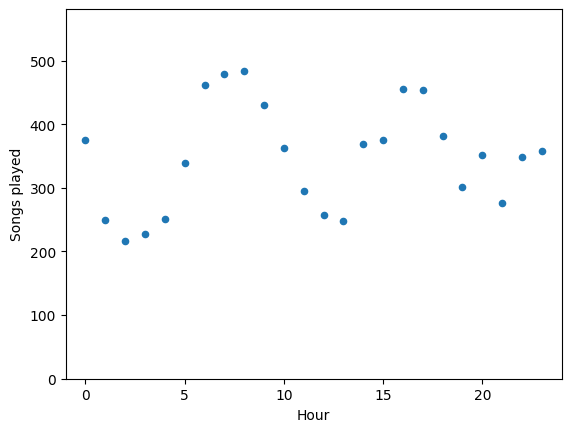

In [19]:
# visualize using pandas
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd["hour"] = pd.to_numeric(songs_in_hour_pd["hour"])

songs_in_hour_pd.plot.scatter(x="hour", y="count")
plt.xlim(-1, 24)
plt.ylim(0, 1.2 * max(songs_in_hour_pd["count"]))
plt.xlabel("Hour")
plt.ylabel("Songs played")

In [20]:
spark.stop()

# Text Processing

In [18]:
from pyspark.context import SparkContext

sc = SparkContext('local', 'intro_to_spark')
sc.setLogLevel("OFF")

In [20]:
raw_hamlet = sc.textFile(name="NonUploadedData/hamlet.txt")
raw_hamlet.take(5)

['hamlet@0\t\tHAMLET',
 'hamlet@8',
 'hamlet@9',
 'hamlet@10\t\tDRAMATIS PERSONAE',
 'hamlet@29']

In [22]:
split_hamlet = raw_hamlet.map(lambda line: line.split('\t'))
split_hamlet.take(5)

[['hamlet@0', '', 'HAMLET'],
 ['hamlet@8'],
 ['hamlet@9'],
 ['hamlet@10', '', 'DRAMATIS PERSONAE'],
 ['hamlet@29']]

In [23]:
# we find and save the lines in which Hamlet speaks
def filter_hamlet_speaks(line):
    speaketh = False
    if "HAMLET" in line:
        speaketh = True
    return speaketh

# takes the lines where HAMLET speaks
hamlet_spoken_lines = split_hamlet.filter(lambda line: filter_hamlet_speaks(line))

# count number of elements in RDD
hamlet_spoken_lines.count()

381

In [24]:
# let's begin the data processing
# remove hamlet@ from the beginning of the line
hamlet_with_ids = split_hamlet.map(lambda line: [line[0].split('@')[-1], *line[1:]])

# remove empty spaces and empty lines
def filter_blanks(line):
    blanks = True
    if len(line) < 2:
        blanks = False   
    return blanks

hamlet_text_only_aux = hamlet_with_ids.map(lambda line: [elemt for elemt in line if elemt != ''])
hamlet_text_only = hamlet_text_only_aux.filter(lambda line: filter_blanks(line))
hamlet_text_only.take(10)

[['0', 'HAMLET'],
 ['10', 'DRAMATIS PERSONAE'],
 ['31', 'CLAUDIUS', 'king of Denmark. (KING CLAUDIUS:)'],
 ['75', 'HAMLET', 'son to the late, and nephew to the present king.'],
 ['132', 'POLONIUS', 'lord chamberlain. (LORD POLONIUS:)'],
 ['177', 'HORATIO', 'friend to Hamlet.'],
 ['204', 'LAERTES', 'son to Polonius.'],
 ['230', 'LUCIANUS', 'nephew to the king.'],
 ['261', 'VOLTIMAND', '|'],
 ['273', '|']]

In [25]:
# remove elements with only '|' and replace '|' by '' where the | is in a string
def fix_pipe(line):
    new_line = []
    for elemt in line:
        if elemt == '|':
            continue
        new_line.append(elemt.replace("|", ""))
    return new_line

clean_hamlet = hamlet_text_only.map(lambda line: fix_pipe(line))
clean_hamlet.take(10)

[['0', 'HAMLET'],
 ['10', 'DRAMATIS PERSONAE'],
 ['31', 'CLAUDIUS', 'king of Denmark. (KING CLAUDIUS:)'],
 ['75', 'HAMLET', 'son to the late, and nephew to the present king.'],
 ['132', 'POLONIUS', 'lord chamberlain. (LORD POLONIUS:)'],
 ['177', 'HORATIO', 'friend to Hamlet.'],
 ['204', 'LAERTES', 'son to Polonius.'],
 ['230', 'LUCIANUS', 'nephew to the king.'],
 ['261', 'VOLTIMAND'],
 ['273']]

In [26]:
sc.stop()

# NLP

Following this tutorial in [kaggle](https://www.kaggle.com/code/surajpm/nlp-using-pyspark-ml).
Data can be downloaded there too.

In [22]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('nlp').getOrCreate()

In [47]:
from pyspark.sql.functions import col, regexp_replace
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [23]:
sdf_train = spark.read.csv('NonUploadedData/pySpark_NLP_train.csv', header=True, inferSchema=True)
sdf_train.printSchema()

root
 |-- id: string (nullable = true)
 |-- keyword: string (nullable = true)
 |-- location: string (nullable = true)
 |-- text: string (nullable = true)
 |-- target: integer (nullable = true)



In [24]:
sdf_train.count()

8387

In [25]:
sdf_train.show(5)

+---+-------+--------+--------------------+------+
| id|keyword|location|                text|target|
+---+-------+--------+--------------------+------+
|  1|   NULL|    NULL|Our Deeds are the...|     1|
|  4|   NULL|    NULL|Forest fire near ...|     1|
|  5|   NULL|    NULL|All residents ask...|     1|
|  6|   NULL|    NULL|13,000 people rec...|     1|
|  7|   NULL|    NULL|Just got sent thi...|     1|
+---+-------+--------+--------------------+------+
only showing top 5 rows



In [33]:
sdf_train.groupBy('target').count().show()

+------+-----+
|target|count|
+------+-----+
|  NULL| 1211|
|     1| 3081|
|     0| 4095|
+------+-----+



In [34]:
# Data pre-processing
ml_df = sdf_train.select("id", "text", "target")
ml_df = ml_df.dropna()
ml_df.count()

7176

In [38]:
# removing numbers from the tweets
ml_df = ml_df.withColumn("only_str", regexp_replace(col('text'), '\d+', ''))
ml_df.show(5)

+---+--------------------+------+--------------------+
| id|                text|target|            only_str|
+---+--------------------+------+--------------------+
|  1|Our Deeds are the...|     1|Our Deeds are the...|
|  4|Forest fire near ...|     1|Forest fire near ...|
|  5|All residents ask...|     1|All residents ask...|
|  6|13,000 people rec...|     1|, people receive ...|
|  7|Just got sent thi...|     1|Just got sent thi...|
+---+--------------------+------+--------------------+
only showing top 5 rows



In [40]:
# tokenize the tweets
regex_tokenizer = RegexTokenizer(inputCol="only_str", outputCol="words", pattern="\\W")
raw_words = regex_tokenizer.transform(ml_df)
raw_words.show(5)

+---+--------------------+------+--------------------+--------------------+
| id|                text|target|            only_str|               words|
+---+--------------------+------+--------------------+--------------------+
|  1|Our Deeds are the...|     1|Our Deeds are the...|[our, deeds, are,...|
|  4|Forest fire near ...|     1|Forest fire near ...|[forest, fire, ne...|
|  5|All residents ask...|     1|All residents ask...|[all, residents, ...|
|  6|13,000 people rec...|     1|, people receive ...|[people, receive,...|
|  7|Just got sent thi...|     1|Just got sent thi...|[just, got, sent,...|
+---+--------------------+------+--------------------+--------------------+
only showing top 5 rows



In [42]:
# remove stop words
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
words_df = remover.transform(raw_words)
words_df.select("id","words","target","filtered").show(5, truncate=False)

+---+---------------------------------------------------------------------------------------------------------------------------------------------------------+------+----------------------------------------------------------------------------------------------------+
|id |words                                                                                                                                                    |target|filtered                                                                                            |
+---+---------------------------------------------------------------------------------------------------------------------------------------------------------+------+----------------------------------------------------------------------------------------------------+
|1  |[our, deeds, are, the, reason, of, this, earthquake, may, allah, forgive, us, all]                                                                       |1     |[deeds, reason, earthquake, ma

In [45]:
# vectorize words: create features column
cv = CountVectorizer(inputCol="filtered", outputCol="features")
model = cv.fit(words_df)
countVectorizer_train = model.transform(words_df)
countVectorizer_train.show(5)

+---+--------------------+------+--------------------+--------------------+--------------------+--------------------+
| id|                text|target|            only_str|               words|            filtered|            features|
+---+--------------------+------+--------------------+--------------------+--------------------+--------------------+
|  1|Our Deeds are the...|     1|Our Deeds are the...|[our, deeds, are,...|[deeds, reason, e...|(19663,[24,65,149...|
|  4|Forest fire near ...|     1|Forest fire near ...|[forest, fire, ne...|[forest, fire, ne...|(19663,[7,100,138...|
|  5|All residents ask...|     1|All residents ask...|[all, residents, ...|[residents, asked...|(19663,[159,584,9...|
|  6|13,000 people rec...|     1|, people receive ...|[people, receive,...|[people, receive,...|(19663,[11,23,159...|
|  7|Just got sent thi...|     1|Just got sent thi...|[just, got, sent,...|[got, sent, photo...|(19663,[32,106,15...|
+---+--------------------+------+--------------------+--

In [50]:
# train and validation split
train, validate = countVectorizer_train.randomSplit([0.8, 0.2], seed=97435)

In [53]:
# machine learning model: Naive Bayes Classifier
nb = NaiveBayes(modelType="multinomial", labelCol="target", featuresCol="features")
nbModel = nb.fit(train)
nb_predictions = nbModel.transform(validate)

In [55]:
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
nb_accuracy = evaluator.evaluate(nb_predictions)
nb_accuracy

0.8034129692832764

In [58]:
# let's look at the predictions
nb_predictions.select('text', 'target', 'prediction').show(5, truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------+------+----------+
|text                                                                                                                                    |target|prediction|
+----------------------------------------------------------------------------------------------------------------------------------------+------+----------+
|Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all                                                                   |1     |1.0       |
|love 106.1 The Twister @1061thetwister  and Maddie and Tae #OKTXDUO                                                                     |0     |0.0       |
|Crazy Mom Threw Teen Daughter a NUDE Twister Sex Party According To Her Friend59 more pics http://t.co/t94LNfwf34 http://t.co/roCyyEI2dM|0     |0.0       |
|Reasons brain twister oneself should discount redesigning

In [59]:
spark.stop()